# **Importing Packages**

In [0]:
import io
import bson                       
import matplotlib.pyplot as plt
from skimage.data import imread  
import multiprocessing as mp    
import keras
import tensorflow as tf

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading and Processing Category File**

In [0]:
catcsv=pd.read_csv('/content/drive/Shared drives/IDS594/cdiscount-image-classification-challenge/category_names.csv')

In [0]:
catcsv=catcsv.drop(['category_level2'], axis=1)

In [0]:
catcsv=catcsv.drop(['category_level3'], axis=1)

In [0]:
uniquecat=catcsv['category_level1'].unique()

In [0]:
catcsv.head()

,category_id,category_level1
0,1000021794,ABONNEMENT / SERVICES
1,1000012764,AMENAGEMENT URBAIN - VOIRIE
2,1000012776,AMENAGEMENT URBAIN - VOIRIE
3,1000012768,AMENAGEMENT URBAIN - VOIRIE
4,1000012755,AMENAGEMENT URBAIN - VOIRIE


# Reading Data from BSON File

In [0]:
import bson

data = bson.decode_file_iter(open('/content/drive/Shared drives/IDS594/cdiscount-image-classification-challenge/train.bson', 'rb'))

# Mapping category Names from Category file to Train Data

**Mapping Category names to the first batch of files**

In [0]:
import itertools

temp = itertools.islice(data,0,1000)

In [0]:
data1=pd.DataFrame(temp)

**Adding a column with empty values**

In [0]:
data1['Category_name']=np.nan

In [0]:
data1.head() #TO check if the Category_names are empty

,_id,category_id,imgs,Category_name
0,0,1000010653,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,NaN
1,1,1000010653,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,NaN
2,2,1000004079,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,NaN
3,3,1000004141,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,NaN
4,4,1000015539,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,NaN


In [0]:
#Code to map category names to our first batch
k=-1
for i in data1['category_id']:
  k=k+1
  z=0
  for j in catcsv['category_id']:
    if i==j:
      data1['Category_name'][k]=catcsv['category_level1'][z]
      break
    z=z+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
data1.head() #Now our data1 has the category names

,_id,category_id,imgs,Category_name
0,0,1000010653,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,TELEPHONIE - GPS
1,1,1000010653,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,TELEPHONIE - GPS
2,2,1000004079,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,INFORMATIQUE
3,3,1000004141,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,INFORMATIQUE
4,4,1000015539,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...,BRICOLAGE - OUTILLAGE - QUINCAILLERIE


**Defining function to map category names to the rest of the batch and appending to Data1**

In [0]:
num=100
seq=1000

In [0]:
for i in range(num):
    temp1=itertools.islice(data,0,seq)
    k=-1
    print(i)
    data2=pd.DataFrame(temp1)
    data2['Category_name']=np.nan
    for l in data2['category_id']:
      k=k+1
      z=0
      for j in catcsv['category_id']:
        if l==j:
          data2['Category_name'][k]=catcsv['category_level1'][z]
          break
        z=z+1
    data1=data1.append(data2, ignore_index= True)

In [0]:
data1.shape

(101000, 4)

**Dropping the Unnecessary columns**

In [0]:
data1=data.drop(['Unnamed: 0','_id','category_id'],axis=1)

**Making Image Tensors by converting Image file into bytes**

In [0]:
tensor_pic =[]

for i in range(len(data1)):

    picture = imread(io.BytesIO(data1['imgs'][i][0]['picture']))
    tensor_pic.append(picture)

In [0]:
data1['imgs_tensor']=tensor_pic

# **Storing and reading the Data from Pickle**

In [0]:
data2_1 = data2[0:25000]
data2_1.to_pickle('/content/drive/Shared drives/IDS594/pooja1.pkl')

In [0]:
data2_2 = data2[25000:50000]
data2_2.to_pickle('/content/drive/Shared drives/IDS594/pooja2.pkl')

In [0]:
data2_3 = data2[50000:75000]
data2_3.to_pickle('/content/drive/Shared drives/IDS594/pooja3.pkl')

In [0]:
data2_4 = data2[75000:100000]
data2_4.to_pickle('/content/drive/Shared drives/IDS594/pooja4.pkl')

In [0]:
import pickle

In [0]:
p1 = pd.read_pickle('/content/drive/Shared drives/IDS594/pooja1.pkl')

In [0]:
p2 = pd.read_pickle('/content/drive/Shared drives/IDS594/pooja2.pkl')

In [0]:
p3 = pd.read_pickle('/content/drive/Shared drives/IDS594/pooja3.pkl')

In [0]:
p4 = pd.read_pickle('/content/drive/Shared drives/IDS594/pooja4.pkl')

In [0]:
pfinal = pd.concat([p1,p2,p3,p4])

In [12]:
pfinal.head()

,Category_name,imgs_tensor
0,TELEPHONIE - GPS,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,TELEPHONIE - GPS,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,INFORMATIQUE,"[[[254, 254, 254], [254, 254, 254], [254, 254,..."
3,INFORMATIQUE,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,BRICOLAGE - OUTILLAGE - QUINCAILLERIE,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


# Taking only those categories which have more than 2000 records

In [0]:
subset_data=pfinal.groupby("Category_name").filter(lambda x: len(x)>2000)

In [14]:
subset_data['Category_name'].value_counts() #Counting number of categories

TELEPHONIE - GPS                         30245
INFORMATIQUE                             16918
DECO - LINGE - LUMINAIRE                  7157
LIBRAIRIE                                 6123
AUTO - MOTO                               6120
BIJOUX -  LUNETTES - MONTRES              4382
BRICOLAGE - OUTILLAGE - QUINCAILLERIE     3083
MUSIQUE                                   2921
JEUX - JOUETS                             2399
ELECTROMENAGER                            2341
Name: Category_name, dtype: int64

**Now there are 10 Category classes with more than 2000 records**

# Converting Integer Labels to One Hot Encoded vectors

**Assigning Integer Labels to each category**

In [0]:
CatInt=list(set(subset_data['Category_name']))

In [16]:
subset_data['Categ Integer'] = subset_data.apply(lambda x: 0 if x['Category_name']==CatInt[0] else 1 if x['Category_name']==CatInt[1] else 2 if x['Category_name']==CatInt[2] else 3 if x['Category_name']==CatInt[3] else 4 if x['Category_name']==CatInt[4] else 5 if x['Category_name']==CatInt[5] else 6 if x['Category_name']==CatInt[6] else 7 if x['Category_name']==CatInt[7] else 8 if x['Category_name']==CatInt[8] else 9 , axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
subset_data.head()

,Category_name,imgs_tensor,Categ Integer
0,TELEPHONIE - GPS,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",4
1,TELEPHONIE - GPS,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",4
2,INFORMATIQUE,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",3
3,INFORMATIQUE,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",3
4,BRICOLAGE - OUTILLAGE - QUINCAILLERIE,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",6


**Changing Integer Labels into list of One Hot Encoder Vector**

In [0]:
labelint=list(subset_data['Categ Integer'])

In [0]:
testingLabels=keras.utils.to_categorical(labelint, num_classes=10)

In [20]:
testingLabels #One hot encoded matrix of labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Dividing the Data into Train(80%) and Test(20%)

**Making separate Dataframes for Data and label**

In [0]:
X=subset_data['imgs_tensor'] #Image tensors would be XData

In [0]:
y=testingLabels #list of One Hot encoded array would be YData

**Spliting Train and Test Data**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_testdata, y_train, y_testdata = train_test_split(X, y, test_size=0.2,stratify=y,random_state=1) # Using Stratify to split 80% proportion to each classes

**Spliting Train and Validation Data**

In [0]:
X_traindata, X_valdata, y_traindata, y_valdata = train_test_split(X_train, y_train, train_size=0.8, random_state=1)

**Reindexing the Train, Test & Validation Data**

In [0]:
X_traindata = X_traindata.reset_index(drop=True)
X_valdata = X_valdata.reset_index(drop=True)
X_testdata = X_testdata.reset_index(drop=True)

 **Resizing 180 * 180 Images to 32 * 32 size for train, test & validation Data**

In [0]:
import cv2

r = 32.0 / 180.0
dim = (32, int(180 * r))
 
# perform the actual resizing of the image and show it
X_traindatare = X_traindata.apply(lambda x:cv2.resize(x, dim, interpolation = cv2.INTER_AREA))

In [0]:
r = 32.0 / 180.0
dim = (32, int(180 * r))
 
# perform the actual resizing of the image and show it
X_testdatare = X_testdata.apply(lambda x:cv2.resize(x, dim, interpolation = cv2.INTER_AREA))

In [0]:
r = 32.0 / 180.0
dim = (32, int(180 * r))
 
# perform the actual resizing of the image and show it
X_valdatare = X_valdata.apply(lambda x:cv2.resize(x, dim, interpolation = cv2.INTER_AREA))

In [30]:
X_valdatare[1].shape

(32, 32, 3)

**Scaling Images Bytes ranging between 0 & 1**

In [0]:
ftrain = X_traindatare
fval = X_valdatare
ftest = X_testdatare
ftrain /= 255
ftest /= 255
fval /= 255

**Converting Train, Test & Validation Data to Numpy Array for Model Input**

In [32]:
X_train_data = []
for myFile in ftrain:
    X_train_data.append(myFile)

print('X_data shape:', np.array(X_train_data).shape)

X_data shape: (52280, 32, 32, 3)


In [0]:
X_train_data2 = np.array(X_train_data)

In [34]:
X_val_data = []
for myFile in fval:
    X_val_data.append(myFile)

print('X_data shape:', np.array(X_val_data).shape)

X_data shape: (13071, 32, 32, 3)


In [0]:
X_val_data2 = np.array(X_val_data)

In [36]:
X_test_data = []
for myFile in ftest:
    X_test_data.append(myFile)

print('X_data shape:', np.array(X_test_data).shape)

X_data shape: (16338, 32, 32, 3)


In [0]:
X_test_data2 = np.array(X_test_data)

# Modelling

In [38]:
from keras import layers
from keras import models
from keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Model Compilation**

In [39]:

from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001, decay=1e-6),
              metrics=['acc'])

**Fitting the Model**

In [40]:
fittedmodel = model.fit(X_train_data2, y_traindata,
              batch_size=100,
              epochs=50,
              validation_data=(X_val_data2, y_valdata),shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 52280 samples, validate on 13071 samples
Epoch 1/50





52280/52280 [==============================] - 32s 615us/step - loss: 2.1271 - acc: 0.4797 - val_loss: 1.8140 - val_acc: 0.5720
Epoch 2/50
52280/52280 [==============================] - 22s 420us/step - loss: 1.7369 - acc: 0.5705 - val_loss: 1.5973 - val_acc: 0.6140
Epoch 3/50
52280/52280 [==============================] - 22s 420us/step - loss: 1.5817 - acc: 0.6003 - val_loss: 1.4734 - val_acc: 0.6303
Epoch 4/50
52280/52280 [==============================] - 22s 421us/step - loss: 1.4719 - acc: 0.6222 - val_loss: 1.3987 - val_acc: 0.6465
Epoch 5/50
52280/52280 [==============================] - 22s 420us/step - loss: 1.3852 - acc: 0.6386 - val_loss: 1.2954 - val_acc: 0.6682
Epoch 6/50
52280/52280 [==============================] - 22s 421us/step - loss: 1.3150 - acc: 0.6523 - val_loss: 1.2449 - val_acc: 0.6687
Epoch 7/50
522

**Saving Model**

In [0]:
model.save('/content/drive/Shared drives/IDS594/BestModel.h5')

# **Evaluating Performance of the Model**

In [44]:
fittedmodel_dict = fittedmodel.history
temp = fittedmodel_dict['val_acc']
temp1 = fittedmodel_dict['acc']

last_10_acc = temp[len(temp)-10:len(temp)]
val_acc_avg = np.sum(last_10_acc)/len(last_10_acc)

last_10_acc_train = temp1[len(temp1)-10:len(temp1)]
train_acc_avg = np.sum(last_10_acc_train)/len(last_10_acc_train)

print("Average Validation Accuracy: ",val_acc_avg*100)
print("Average training Accuracy: ",train_acc_avg*100)

Average Validation Accuracy:  76.22064083953704
Average training Accuracy:  77.36227987098985


In [43]:
scores = model.evaluate(X_test_data2, y_testdata, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

16338/16338 [==============================] - 3s 194us/step
Test loss: 0.830925519119965
Test accuracy: 0.7661892520285453


**Plotting Training and Validation Accuracy**

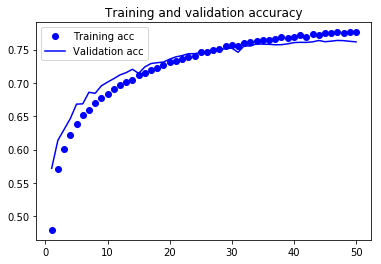

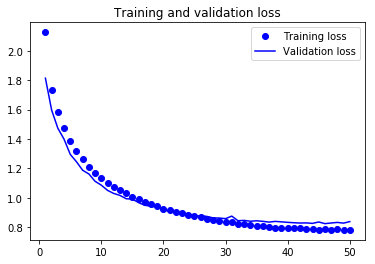

In [46]:
import matplotlib.pyplot as plt
fittedmodel_dict = fittedmodel.history
acc = fittedmodel_dict['acc']
val_acc = fittedmodel_dict['val_acc']
loss = fittedmodel_dict['loss']
val_loss = fittedmodel_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Predicting on Test Set**

In [0]:
# predict probabilities for test set
testpred_probs = model.predict(X_test_data2, verbose=0)
# predict classes for test set
testpred_classes = model.predict_classes(X_test_data2, verbose=0)

**Evaluating Confusion Matrix, Precision, Recall**

In [0]:
from sklearn import metrics

matrix = metrics.confusion_matrix(y_testdata.argmax(axis=1), testpred_classes)

In [116]:
print(matrix)

[[ 217    6   28   53   18   86   21    4   27    8]
 [   3 1079    1    7   16    6    1   43   63    6]
 [  17    6  593   23   21   79    9   30   82   16]
 [  22   16   37 2871  142  133   36    9   84   34]
 [  14   14   46  148 5457  137   24   48  123   38]
 [  69   11   48   87   44  800   34   23   71   37]
 [  41   11   64   48   62  141  123   11   95   21]
 [   0   36    8    2   12    4    3  446   69    4]
 [  30   98  105   51   71   90   21  107  789   69]
 [   7   31   36   15   30   71   14   13  120  143]]


In [117]:
print(metrics.classification_report(y_testdata.argmax(axis=1), testpred_classes, digits=3))

              precision    recall  f1-score   support

           0      0.517     0.464     0.489       468
           1      0.825     0.881     0.852      1225
           2      0.614     0.677     0.644       876
           3      0.869     0.848     0.858      3384
           4      0.929     0.902     0.915      6049
           5      0.517     0.654     0.577      1224
           6      0.430     0.199     0.272       617
           7      0.608     0.764     0.677       584
           8      0.518     0.551     0.534      1431
           9      0.380     0.298     0.334       480

    accuracy                          0.766     16338
   macro avg      0.621     0.624     0.615     16338
weighted avg      0.767     0.766     0.763     16338



**Load the Model**

In [0]:
from keras.models import load_model

model=load_model('/content/drive/Shared drives/IDS594/BestModel.h5')

**Predicted Images**

Predicted Class: 4


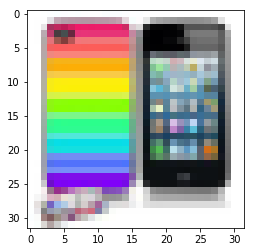

In [118]:
plt.imshow(X_test_data2[0])
print('Predicted Class:', testpred_classes[0])

Predicted Class: 3


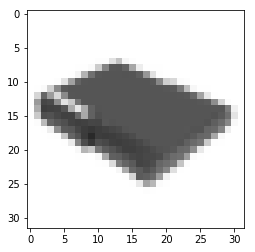

In [119]:
plt.imshow(X_test_data2[1])
print('Predicted Class:', testpred_classes[1])

Predicted Class: 8


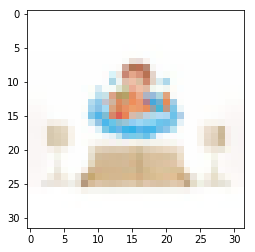

In [120]:
plt.imshow(X_test_data2[2])
print('Predicted Class:', testpred_classes[2])

Predicted Class: 2


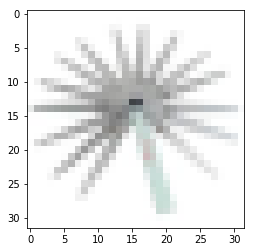

In [121]:
plt.imshow(X_test_data2[3])
print('Predicted Class:', testpred_classes[3])

Predicted Class: 2


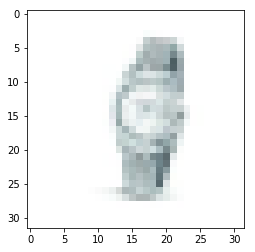

In [122]:
plt.imshow(X_test_data2[4])
print('Predicted Class:', testpred_classes[4])